In [51]:
#imports
%load_ext autoreload
%autoreload 2
import json
import numpy as np
import pandas as pd
import parse_data.prepare_data as prepare_data
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import data_extraction.get_indices as get_indices
import plotting.plot_trajectory as plot_trajectory
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import globals
import scipy
import math
import parse_data.preprocess as preprocess
import flip_rotate_headangle_functions
import headangle_bin_assignment
import headangle_analysis_plotting_functions
import analysis.loser_inferred_choice as loser_inferred_choice
import analysis.wall_choice as wall_choice
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import matplotlib.cm as cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis'

json_filenames_all_social = [r'Json_data/2024-09-13_11-31-00_YansuJerrySocial.json',
                             r'Json_data/2024-09-27_14-25-20_SaraEmilySocial.json',
                             r'Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json',
                             r'Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json',
                             r'Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json']

In [52]:
df, trial_list = prepare_data.prepare_combined_session_data(data_folder, json_filenames_all_social)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis/Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
Preprocessing complete.
Preprocessing complete.
Preprocessing complete.
Preprocessing complete.


In [53]:
#filter for trials 

#High-Low
trial_list_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
trial_list_HL = [trial_list[i] for i in trial_list_indices]

#45° wall separation
single_wall_sep_trial_indices = get_indices.get_trials_with_wall_sep(trial_list_HL, wall_sep=1)
trial_list_45_HL = [trial_list_HL[i] for i in single_wall_sep_trial_indices]

#player 1 losses
player1_loss_indices = get_indices.get_player_win_indices(trial_list_45_HL, player_id=0)
trial_list_1L_45_HL = [trial_list_45_HL[i] for i in player1_loss_indices]
print(len(trial_list_1L_45_HL))

#player 0 losses
player0_loss_indices = get_indices.get_player_win_indices(trial_list_45_HL, player_id=1)
trial_list_0L_45_HL = [trial_list_45_HL[i] for i in player0_loss_indices]
print(len(trial_list_0L_45_HL))

85
117


In [80]:
#create new trial list containing trials with updated yaws and coordinates for p0
p0L_updated_trial_list = flip_rotate_headangle_functions.process_and_update_trials(trial_list_0L_45_HL, 0)

In [81]:
#create new trial list containing trials with updated yaws and coordinates for p1
p1L_updated_trial_list = flip_rotate_headangle_functions.process_and_update_trials(trial_list_1L_45_HL, 1)

In [82]:
#create new trial list containing trials with updated yaws and coordinates for p1
p1W_updated_trial_list = flip_rotate_headangle_functions.process_and_update_trials(trial_list_0L_45_HL, 1)

In [83]:
#create new trial list containing trials with updated yaws and coordinates for p1
p0W_updated_trial_list = flip_rotate_headangle_functions.process_and_update_trials(trial_list_1L_45_HL, 0)

In [ ]:
#sort head angle into bin for all updated trials
bin_assignments1 = headangle_bin_assignment.assign_bins_to_all_trials(trial_list=p1W_updated_trial_list, player_id=1)
for idx, bin_index in enumerate(bin_assignments1):
    print(f"Trial {idx}: Bin {bin_index}")

In [ ]:
#sort head angle into bin for all updated trials
bin_assignments0 = headangle_bin_assignment.assign_bins_to_all_trials(trial_list=p0W_updated_trial_list, player_id=0)
for idx, bin_index in enumerate(bin_assignments0):
    print(f"Trial {idx}: Bin {bin_index}")

In [ ]:
#sort head angle into bin for all updated trials
bins_p0 = headangle_bin_assignment.assign_bins_to_all_trials(trial_list=p0L_updated_trial_list, player_id=0)
for idx, bin_index in enumerate(bins_p0):
    print(f"Trial {idx}: Bin {bin_index}")

In [ ]:
#sort head angle into bin for all updated trials
bins_p1 = headangle_bin_assignment.assign_bins_to_all_trials(trial_list=p1L_updated_trial_list, player_id=0)
for idx, bin_index in enumerate(bins_p1):
    print(f"Trial {idx}: Bin {bin_index}")

In [93]:
player_choice0 = wall_visibility_and_choice.get_player_wall_choice(p0L_updated_trial_list, 0, inferred_choice=True, debug=False)
player_choice1 = wall_visibility_and_choice.get_player_wall_choice(p1L_updated_trial_list, 1, inferred_choice=True, debug=False)

In [94]:
given_wall_chosen_session0 = get_indices.was_given_wall_chosen(p0L_updated_trial_list, player_choice0, 0)

In [95]:
given_wall_chosen_session1 = get_indices.was_given_wall_chosen(p1L_updated_trial_list, player_choice1, 0)

In [108]:
high_wall_chosen_l0 = given_wall_chosen_session0.astype(int)
high_wall_chosen_l1 = given_wall_chosen_session1.astype(int)
print(high_wall_chosen_l1)


[0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0]


In [109]:
#determine which trials the winning player chose high
HW_w0 = get_indices.was_high_wall_chosen(p0W_updated_trial_list) 
high_wall_chosen_w0 = np.array(HW_w0, dtype=int)
HW_w1 = get_indices.was_high_wall_chosen(p1W_updated_trial_list)
high_wall_chosen_w1 = np.array(HW_w1, dtype=int)
print(high_wall_chosen_w0)

[1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 1 0 1 0 1]
<class 'numpy.int64'>


In [111]:
 #obtain ratios for how many times the winning player chose high given a head angle bin
#over the number of trials overall with that head angle bin

from collections import defaultdict

#create dictionaries to store counts of True values and total trials per bin
bin_true_counts = defaultdict(int) #number of times high wall was chosen given specific initial bin
bin_total_counts = defaultdict(int) #number of trials in specific bin overall

#bin assignments and high wall chosen for all trial lists
trial_data_lists = [(bins_p0, high_wall_chosen_l0), 
                    (bins_p1, high_wall_chosen_l1),
                    (bin_assignments0, high_wall_chosen_w0), 
                    (bin_assignments1, high_wall_chosen_w1)]

#iterate through all provided trial lists
for bin_assignments, high_wall_chosen in trial_data_lists:

    #iterate over both lists simultaneously for the current trial list
    for bin_index, is_high_wall_chosen in zip(bin_assignments, high_wall_chosen):
        bin_total_counts[bin_index] += 1  #increment total trial count for the bin
        
        if is_high_wall_chosen:          #increment True count if high wall is chosen
            bin_true_counts[bin_index] += 1

#calculate the ratio for each bin
bin_probabilities = {bin_index: bin_true_counts[bin_index] / bin_total_counts[bin_index]
              for bin_index in sorted(bin_total_counts)}
 
#convert the dictionary to a list of values
bin_probabilities_list = list(bin_probabilities.values())

#order by bin index
probabilities_list = [bin_probabilities[bin_index] for bin_index in sorted(bin_total_counts)]

print(probabilities_list)

#print the results
for bin_index, probability in sorted(bin_probabilities.items()):
    print(f"Bin {bin_index}: {probability:.2f} (True/Total = {bin_true_counts[bin_index]}/{bin_total_counts[bin_index]})")



[0.6056338028169014, 0.5833333333333334, 0.3617021276595745, 0.325, 0.32727272727272727, 0.32608695652173914, 0.5961538461538461, 0.6666666666666666]
Bin 1: 0.61 (True/Total = 43/71)
Bin 2: 0.58 (True/Total = 28/48)
Bin 3: 0.36 (True/Total = 17/47)
Bin 4: 0.33 (True/Total = 13/40)
Bin 5: 0.33 (True/Total = 18/55)
Bin 6: 0.33 (True/Total = 15/46)
Bin 7: 0.60 (True/Total = 31/52)
Bin 8: 0.67 (True/Total = 30/45)


In [112]:
bin_ranges = headangle_bin_assignment.define_45_degree_bins()
print(bin_ranges)

[(np.float64(5.8904862254808625), np.float64(0.3926990816987242)), (np.float64(0.39269908169872414), np.float64(1.1780972450961724)), (np.float64(1.1780972450961726), np.float64(1.963495408493621)), (np.float64(1.9634954084936211), np.float64(2.7488935718910694)), (np.float64(2.748893571891069), np.float64(3.5342917352885173)), (np.float64(3.5342917352885173), np.float64(4.319689898685965)), (np.float64(4.319689898685965), np.float64(5.105088062083414)), (np.float64(5.105088062083414), np.float64(5.890486225480862))]


In [114]:
#calculate average p(H) regardless of bin

from collections import defaultdict

#initialize counters for the total high wall choices and total trials overall
true_counts = 0
total_counts = 0

#bin assignments and high wall chosen for all trial lists
trial_data_lists = [(bins_p0, high_wall_chosen_l0), 
                    (bins_p1, high_wall_chosen_l1),
                    (bin_assignments0, high_wall_chosen_w0), 
                    (bin_assignments1, high_wall_chosen_w1)]


#iterate through all provided trial lists
for bin_assignments, high_wall_chosen in trial_data_lists:

    #iterate over both lists simultaneously for the current trial list
    for is_high_wall_chosen in high_wall_chosen:
        total_counts += 1  #increment total trial count for the bin
        
        if is_high_wall_chosen:          #increment True count if high wall is chosen
            true_counts += 1

#calculate the average ratio 
print(true_counts)
print(total_counts)
overall_probability = true_counts / total_counts

print(overall_probability)


195
404
0.48267326732673266


In [115]:
#obtain difference between p(H) given bin and average p(H)

new_probabilities_list = [probability - overall_probability for probability in probabilities_list]
print(new_probabilities_list)

[0.12296053549016872, 0.10066006600660071, -0.12097113966715817, -0.15767326732673265, -0.1554005400540054, -0.15658631080499352, 0.11348057882711349, 0.18399339933993397]


(2, 8)


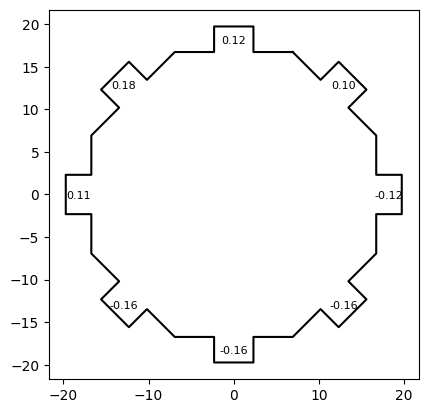

In [116]:
#plot octagon with new ratios list 
ax = plot_octagon.plot_octagon()

#define ratios list
new_probabilities_list = new_probabilities_list

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list)

plt.show()


(2, 8)


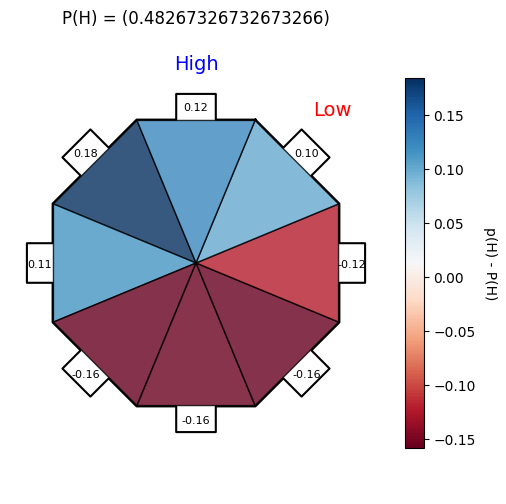

[0.12296053549016872, 0.10066006600660071, -0.12097113966715817, -0.15767326732673265, -0.1554005400540054, -0.15658631080499352, 0.11348057882711349, 0.18399339933993397]


In [117]:
#plot color gradient octagon for new ratios list

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
new_probabilities_list = new_probabilities_list
new_probabilities_list_reversed = new_probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Blue')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Red')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=cm.RdBu, norm=plt.Normalize(vmin=min(new_probabilities_list), vmax=max(new_probabilities_list)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("p(H) - P(H)", rotation=270, labelpad=15)

plt.title(f"P(H) = ({overall_probability})")
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list)